In [ ]:
SIZE = 100


## CODE

In [ ]:
class Vertex:

    def __init__(self, node):
        self.id = node
        self.adjacent = {}


        if int(node)==id:
          return id




    def __str__(self):
        #return str(self.id) + ' adjacent: ' + str([x.id for x in self.adjacent])
        return str([x.id for x in self.adjacent])



    def add_neighbor(self, neighbor, weight=0):
        self.adjacent[neighbor] = weight

    def get_connections(self):
        return self.adjacent.keys()

    def get_id(self):
        return self.id

    def get_weight(self, neighbor):
        return self.adjacent[neighbor]



In [ ]:
class Graph:
    def __init__(self):
        self.vert_dict = {} #key=vertex, values=
        self.num_vertices = 0


    def __iter__(self):
        return iter(self.vert_dict.values())

    def add_vertex(self, node):
        self.num_vertices = self.num_vertices + 1

        new_vertex = Vertex(node)
        self.vert_dict[node] = new_vertex
        return new_vertex

    def get_vertex(self, n):
        if n in self.vert_dict:
            return self.vert_dict[n]
        else:
            return None

    def add_edge(self, frm, to, cost):
        if frm not in self.vert_dict:
            self.add_vertex(frm)
        if to not in self.vert_dict:
            self.add_vertex(to)
        #print("connected ", frm , "with" , to)
        self.vert_dict[frm].add_neighbor(self.vert_dict[to], cost)
        self.vert_dict[to].add_neighbor(self.vert_dict[frm], cost)

    def get_vertices(self):
        return self.vert_dict.keys()

    def get_values(self):
      return self.vert_dict.values()

In [ ]:

from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

def createGaussian(size):
  gaussianDist=random.normal(loc=50.0, scale=10.0, size=SIZE*SIZE)
  sns.distplot(gaussianDist, hist=False)

  plt.show()
  return gaussianDist

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def createGraph(SIZE, Gaussian):
  G = Graph()
  size=SIZE
  gaussianDist=[]

  if Gaussian==True:
    gaussianDist=createGaussian(size)

  matrix = np.ones((size,size))
  c=0
  for r in range(0, size):
    for k in range(0,size):
      matrix[r][k]=c
      c+=1

  print(matrix)
  #matrix=np.ones(shape=(size,size))
  count=0
  for i in range(size):
    for j in range(size):
      #G.add_vertex(matrix[i][j])


      if(j<size-1): #the last index will be one less
        if Gaussian==True:
          w=gaussianDist[count]
        else:
          w=np.random.randint(1,100)

        G.add_edge(matrix[i][j],matrix[i][j+1],w )
        #print("adding right weight of ", w, "between",i,j)
      if(j>0): # and j<size-1): #if j is 1
        #w=np.random.randint(1,100)
        #w=w=gaussianDist[count]
        if Gaussian==True:
          w=gaussianDist[count]
        else:
          w=np.random.randint(1,100)

        G.add_edge(matrix[i][j],matrix[i][j-1],w)
        #print("adding left weight of",w,"between", i,j)
      if(i<size-1):
        #w=np.random.randint(1,100)
        #w=gaussianDist[count]
        if Gaussian==True:
          w=gaussianDist[count]
        else:
          w=np.random.randint(1,100)

        G.add_edge(matrix[i][j], matrix[i+1][j],w)
        #print("adding down weight of",w," between", i,j)
      if(i>0):# and i<size-1):
        #w=np.random.randint(1,100)
        #w=gaussianDist[count]
        if Gaussian==True:
          w=gaussianDist[count]
        else:
          w=np.random.randint(1,100)

        G.add_edge(matrix[i][j], matrix[i-1][j],np.random.randint(1,100))
        #print("adding up weight of ",w, " between", i,j)
      count=count+1

  G.get_vertices()
  return G





In [ ]:
count

160000

In [ ]:
len(G.get_vertices())


160000

In [ ]:
#checking if everything has been added correctly
for v in G:
    for w in v.get_connections():
            vid = v.get_id()
            wid = w.get_id()
            print ( '( %s , %s, %3d)'  % ( vid, wid, v.get_weight(w)))

for v in G:

  print ('g.vert_dict[%s]=%s' %(v.get_id(), G.vert_dict[v.get_id()]))

In [ ]:
def findcost(u,dist,prev,q,site):
  for n in u.get_connections():
      cost = u.get_weight(n)
      uid=u.get_id()
      temp=dist[int(uid)]+ cost
      nid=n.get_id()
      if temp<dist[int(nid)]:
        dist[int(nid)]=temp
        prev[int(nid)]=u
        site[int(nid)]=site[int(uid)]
        q.put(nid,temp)

In [ ]:
def findcostThreshold(u,dist,prev,q,site):
  for n in u.get_connections():
      cost = u.get_weight(n)
      if cost<50:
        cost=cost/2
      else:
        cost=cost*2
      uid=u.get_id()
      temp=dist[int(uid)]+ cost
      nid=n.get_id()
      if temp<dist[int(nid)]:
        dist[int(nid)]=temp
        prev[int(nid)]=u
        site[int(nid)]=site[int(uid)]
        q.put(nid,temp)


In [ ]:
def findcostmax(u, dist, prev, q, paths, site):

    for n in u.get_connections():
        cost = u.get_weight(n)
        uid = u.get_id()

        path = paths[int(uid)]
        maxE = max(path)

        if cost > maxE:
            maxE = cost

        path_distance = dist[int(uid)] + cost
        path_cost = path_distance + maxE * 1000
        nid = n.get_id()

        if path_cost < dist[int(nid)] + max(paths[int(nid)]) * 1000:
            dist[int(nid)] = path_distance  # original_dist #new_dist runs into infinite loop
            prev[int(nid)] = u
            site[int(nid)] = site[int(uid)]
            paths[int(nid)] = paths[int(uid)].copy()
            paths[int(nid)].append(cost)
            q.put(nid, path_distance)

In [ ]:
def getSecondMax(path):
    if len(path) == 0:
        return 0
    if len(path) == 1:
        return path[-1]
    else:
        return path[-2]

def findcostsecmax(u, dist, prev, q, paths, site):  # SECOND MAX EDGE

    for n in u.get_connections():
        cost = u.get_weight(n)
        uid = u.get_id()

        path = paths[int(uid)]
        secondMax = getSecondMax(path)

        if cost > secondMax:
            if cost > path[-1]:
                secondMax = path[-1]
            else:
                secondMax = cost


        path_distance = dist[int(uid)] + cost
        path_cost = path_distance + secondMax * 1000
        nid = n.get_id()

        if path_cost < dist[int(nid)] + getSecondMax(paths[int(nid)]) * 1000:
            dist[int(nid)] = path_distance  # original_dist #new_dist runs into infinite loop
            prev[int(nid)] = u
            site[int(nid)] = site[int(uid)]
            paths[int(nid)] = paths[int(uid)].copy()
            paths[int(nid)].append(cost)
            paths[int(nid)].sort()
            q.put(nid, path_distance)

In [ ]:
def getThirdMax(path):
    if len(path) == 0:
        return 0
    if len(path) == 1:
        return path[-1]
    if len(path) == 2:
        return path[-2]
    else:
      return path[-3]

def findcostthirdmax(u, dist, prev, q, paths, site):  # THIRD MAX EDGE

    for n in u.get_connections():
        cost = u.get_weight(n)
        uid = u.get_id()

        path = paths[int(uid)]
        thirdMax = getThirdMax(path)

        if cost > thirdMax:
            if cost > path[-1]:
                thirdMax = path[-1]
            if cost > path[-2]:
                thirdMax = path[-2]
            else:
                thirdMax = cost


        path_distance = dist[int(uid)] + cost
        path_cost = path_distance + thirdMax * 1000
        nid = n.get_id()

        if path_cost < dist[int(nid)] + getThirdMax(paths[int(nid)]) * 1000:
            dist[int(nid)] = path_distance
            prev[int(nid)] = u
            site[int(nid)] = site[int(uid)]
            paths[int(nid)] = paths[int(uid)].copy()
            paths[int(nid)].append(cost)
            paths[int(nid)].sort()
            q.put(nid, path_distance)

In [ ]:
# def findcostMAXEDGE(u,dist,prev,q, maxEdge,site):
#   for n in u.get_connections():
#       cost = u.get_weight(n)
#       uid=u.get_id()
#       maxE=maxEdge[int(uid)]

#       if(cost>maxE):
#         maxE=cost
#       sum_of_edges=dist[int(uid)]+ cost
#       path_cost=sum_of_edges+maxE*1000
#       nid=n.get_id()
#       if(path_cost < dist[int(nid)]+ maxEdge[int(nid)]*1000):
#           dist[int(nid)]=sum_of_edges #original_dist #new_dist runs into infinite loop
#           prev[int(nid)]=u
#           site[int(nid)]=site[int(uid)]
#           maxEdge[int(nid)]= maxE

#           q.put(nid,sum_of_edges ) #original_dist

In [ ]:
def findcostRECIPROCAL(u,dist,prev,q,site): #RECIPROCAL
  for n in u.get_connections():
      cost = u.get_weight(n)
      uid=u.get_id()
      temp=dist[int(uid)]+(1/cost)
      nid=n.get_id()
      if temp<dist[int(nid)]:
        dist[int(nid)]=temp
        prev[int(nid)]=u
        site[int(nid)]=site[int(uid)]
        q.put(nid,temp)

In [ ]:
import math


def findcostEdgeDiff(u, dist, prev, q, paths, site):


    for n in u.get_connections():
        cost = u.get_weight(n)
        uid = u.get_id()
        path = paths[int(uid)]
        prevcost=path[-1] #is this getting the last edge's cost?

        temp=dist[int(uid)]+abs(cost-prevcost)
        nid=n.get_id()
        if temp<dist[int(nid)]:
          dist[int(nid)]=temp
          prev[int(nid)]=u
          site[int(nid)]=site[int(uid)]
          paths[int(nid)] = paths[int(uid)].copy()
          paths[int(nid)].append(cost)
          #paths[int(nid)].sort()
          q.put(nid,temp)









In [ ]:
# def findcost4(u,dist,prev,q, maxEdge,secondmaxEdge,site): #SECOND MAX EDGE
#   #list_of_costs=[]
#   for n in u.get_connections():

#       cost = u.get_weight(n)
#       #list_of_costs.append(cost)
#       uid=u.get_id()
#       maxE=maxEdge[int(uid)]
#       secondmaxE=secondmaxEdge[int(uid)]
#       #secondmaxE=maxEdge[int(uid)]
#       # if(len(list_of_costs)>1):
#       #   list_of_costs.sort()
#       #   secondMaxE= list_of_costs[-2]
#       # else:
#       #   secondMaxE=cost
#       if(cost>maxE):
#         maxE=cost
#         if(cost>secondmaxE and secondmaxE<maxE):
#           secondmaxE=cost

#       sum_of_edges=dist[int(uid)]+ cost
#       path_cost=sum_of_edges+secondmaxE*1000
#       nid=n.get_id()
#       if(path_cost < dist[int(nid)]+ secondmaxEdge[int(nid)]*1000):
#           dist[int(nid)]=sum_of_edges #original_dist #new_dist runs into infinite loop
#           prev[int(nid)]=u
#           site[int(nid)]=site[int(uid)]
#           secondmaxEdge[int(nid)]= secondmaxE

#           q.put(nid,sum_of_edges ) #original_dist

In [ ]:
# def findcost5(u,dist,prev,q, maxEdge,site): #THIRD MAX EDGE NOT WORKINGGGG
#   list_of_costs=[]
#   for n in u.get_connections():

#       cost = u.get_weight(n)
#       list_of_costs.append(cost)
#       uid=u.get_id()
#       #maxE=maxEdge[int(uid)]
#       #secondmaxE=maxEdge[int(uid)]
#       if(len(list_of_costs)>2):
#         list_of_costs.sort()
#         thirdMaxE= list_of_costs[-3]
#       else:
#         thirdMaxE=min(list_of_costs)
#       # if(cost>maxE):
#       #   maxE=cost

#       sum_of_edges=dist[int(uid)]+ cost
#       path_cost=sum_of_edges+thirdMaxE*(1000)
#       nid=n.get_id()
#       if(path_cost < dist[int(nid)]+ maxEdge[int(nid)]*(1000)):
#           dist[int(nid)]=sum_of_edges #original_dist #new_dist runs into infinite loop
#           prev[int(nid)]=u
#           site[int(nid)]=site[int(uid)]
#           maxEdge[int(nid)]= thirdMaxE

#           q.put(nid,sum_of_edges ) #original_dist

In [ ]:
def recolor(matrix,site,size):
  for i in range(size):
    for j in range(size):
      matrix[i][j]=site[i*size+j]
  return matrix


In [ ]:
import numpy as np
def normalize(matrix,size):
  N=np.zeros(shape=(size,size))
  mat_flattened = matrix.flatten()
  min = np.min(mat_flattened)
  max=np.max(mat_flattened)
  for x in range(size):
      for y in range(size):
        N[x][y]=(matrix[x][y]-min ) * (255/(max-min))
  return N


In [ ]:
import math
import queue as Q
import heapq as hq
import ast


def dijsktra(Graph, src, costMetric,size):
    # costmetric 0=dijkstra, 1=threshold with 50, 2=multiplied maxEdge by 1000

    c = 0
    start = [None] * len(src)
    for i in src:
        start[c] = int(i)
        c = c + 1

    # print(start)
    matrix = np.zeros(shape=(size, size))
    dist = [None] * (size * size)
    print(len(dist))
    prev = [None] * (size * size)
    maxEdge = [math.inf] * (size * size)
    site = [None] * (size * size)
    paths = [[]] * (size * size)

    for j in start:
        dist[j] = 0
        maxEdge[j] = 0
        site[j] = j
        paths[j].append(0)

    q = Q.PriorityQueue()

    for v in Graph:
        vID = v.get_id()  # float originally

        if (not (int(vID) in start)):
            dist[int(vID)] = math.inf  # index has to be int
            prev[int(vID)] = None

        q.put(vID, dist[int(vID)])

    while not q.empty():

        uu = q.get()

        u = Graph.get_vertex(uu)  # turning uu into a vertex item

        if (costMetric == 0):
            findcost(u, dist, prev, q, site)

        if (costMetric == 1):
            findcostThreshold(u, dist, prev, q, site)

        if (costMetric == 2):  # max edge
            findcostmax(u, dist, prev, q, paths, site)

        if (costMetric == 3):  # reciprocal of distance
            findcostRECIPROCAL(u, dist, prev, q, site)

        if (costMetric == 4):  # second max edge
            findcostsecmax(u, dist, prev, q, paths, site)

        if (costMetric == 5):  # third max edge
            findcostthirdmax(u, dist, prev, q, paths, site)

        if (costMetric == 6):  # Adding by the abs diff between new and prevs edges
            findcostEdgeDiff(u, dist, prev, q, paths, site)

    for x in range(size):
        for y in range(size):
            matrix[x][y] = dist[x * size + y]

    return matrix, site

## RESULTS

In [ ]:
G=createGraph(SIZE,False)

[[0.000e+00 1.000e+00 2.000e+00 ... 9.700e+01 9.800e+01 9.900e+01]
 [1.000e+02 1.010e+02 1.020e+02 ... 1.970e+02 1.980e+02 1.990e+02]
 [2.000e+02 2.010e+02 2.020e+02 ... 2.970e+02 2.980e+02 2.990e+02]
 ...
 [9.700e+03 9.701e+03 9.702e+03 ... 9.797e+03 9.798e+03 9.799e+03]
 [9.800e+03 9.801e+03 9.802e+03 ... 9.897e+03 9.898e+03 9.899e+03]
 [9.900e+03 9.901e+03 9.902e+03 ... 9.997e+03 9.998e+03 9.999e+03]]


In [ ]:
G.get_vertices()

dict_keys([0.0, 1.0, 100.0, 2.0, 101.0, 3.0, 102.0, 4.0, 103.0, 5.0, 104.0, 6.0, 105.0, 7.0, 106.0, 8.0, 107.0, 9.0, 108.0, 10.0, 109.0, 11.0, 110.0, 12.0, 111.0, 13.0, 112.0, 14.0, 113.0, 15.0, 114.0, 16.0, 115.0, 17.0, 116.0, 18.0, 117.0, 19.0, 118.0, 20.0, 119.0, 21.0, 120.0, 22.0, 121.0, 23.0, 122.0, 24.0, 123.0, 25.0, 124.0, 26.0, 125.0, 27.0, 126.0, 28.0, 127.0, 29.0, 128.0, 30.0, 129.0, 31.0, 130.0, 32.0, 131.0, 33.0, 132.0, 34.0, 133.0, 35.0, 134.0, 36.0, 135.0, 37.0, 136.0, 38.0, 137.0, 39.0, 138.0, 40.0, 139.0, 41.0, 140.0, 42.0, 141.0, 43.0, 142.0, 44.0, 143.0, 45.0, 144.0, 46.0, 145.0, 47.0, 146.0, 48.0, 147.0, 49.0, 148.0, 50.0, 149.0, 51.0, 150.0, 52.0, 151.0, 53.0, 152.0, 54.0, 153.0, 55.0, 154.0, 56.0, 155.0, 57.0, 156.0, 58.0, 157.0, 59.0, 158.0, 60.0, 159.0, 61.0, 160.0, 62.0, 161.0, 63.0, 162.0, 64.0, 163.0, 65.0, 164.0, 66.0, 165.0, 67.0, 166.0, 68.0, 167.0, 69.0, 168.0, 70.0, 169.0, 71.0, 170.0, 72.0, 171.0, 73.0, 172.0, 74.0, 173.0, 75.0, 174.0, 76.0, 175.0, 77.0,

In [ ]:
m,site=dijsktra(G, [90,210,999,1609,8686,130878,34546,10989,20543,69432,19000,148777,154389,89060,122130],0, SIZE)

490000


In [ ]:
m,site= dijsktra(G,[6,98,450,934,1206,1734,2198,4380,6302,7825,9954],0,SIZE)

10000


In [ ]:
m,site=dijsktra(G, [90,210,999,1609,8686,130878,34546,10989,20543,69432,19000,148777,154389,89060,122130],0, SIZE)

160000


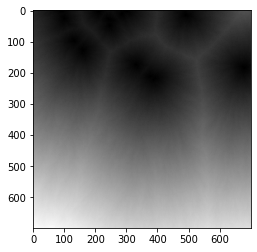

In [ ]:
from matplotlib import pyplot as plt

#m=normalize(m,SIZE)
plt.gray()
plt.imshow(m, interpolation='nearest')

plt.show()

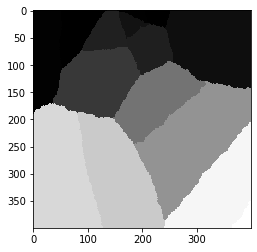

In [ ]:
m_segmented=recolor(m,site,SIZE)
plt.gray()
plt.imshow(m_segmented, interpolation='nearest')
plt.show()

In [ ]:
#m0,site=dijsktra(G,[10,100,34499,39867,932,3000,15222,6310,7438,19898],0 )
#m0,site=dijsktra(G, [10,510,999,11300,20311,25080,50499,87321,100400,120999,150333,17777,195000,210476,240987],0)
#m0,site=dijsktra(G, [90,210,999,16090,20999,23080,50401,87100,100800,120250,150333,195099,210700,240120],0)
m0,site=dijsktra(G, [90,210,999,1609,5000,8686],0, SIZE)


10000


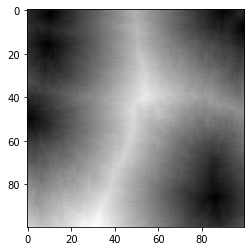

In [ ]:
from matplotlib import pyplot as plt

m0=normalize(m0,SIZE)
plt.gray()
plt.imshow(m0, interpolation='nearest')

plt.show()

In [ ]:
m1,site=dijsktra(G, [90,210,999,1609,5000,8686],1,SIZE)


10000


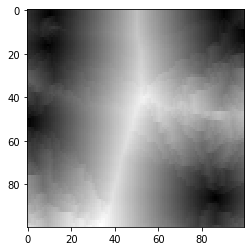

In [ ]:

m2=normalize(m2,SIZE)
plt.gray()
plt.imshow(m2, interpolation='nearest')

plt.show()

In [ ]:
m4,site=dijsktra(G, [90,210,999,1609,5000,8686],4,SIZE)


10000


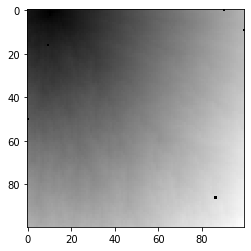

In [ ]:
m4
m4=normalize(m4,SIZE)
plt.gray()
plt.imshow(m4, interpolation='nearest')

plt.show()

In [ ]:
type(m4)

numpy.ndarray

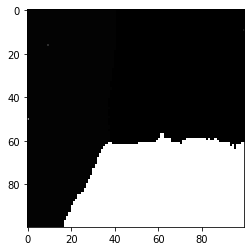

In [ ]:
from matplotlib import pyplot as plt

m_segmented=recolor(m4,site,SIZE)

plt.gray()
plt.imshow(m_segmented, interpolation='nearest')

plt.show()

In [ ]:
m1=dijsktra(G,[10,100,499,867,932,3000,5222,6310,7438,9898],1 ,SIZE)
#m1= dijsktra(G,[999,11300,20311,50499,87321,100400,120999,150333,147777,155074,134560,30291],1)
#m1= dijsktra(G,[999,11300,200311,400499,87321,100400,120999,150333,17777,195000,210476,240987],1)
#m1,site=dijsktra(G, [90,210,999,16090,20999,23080,50401,87100,100800,120250,150333,195099,210700,240120],1)



10000


In [ ]:
m4=dijsktra(G,[10,100,499,867,932,3000,5222,6310,7438,9898],4 ,SIZE)

10000


In [ ]:
m,site= dijsktra(G,[999,11300,20311,50499,87321,100400,120999,150333,147777,155074,134560,30291],5,SIZE)


160000


In [ ]:
m,site= dijsktra(G,[40,973,3443,8609,13426,16780,20982,67606,140902,11763],5,SIZE)

160000


In [ ]:
type(m)

numpy.ndarray

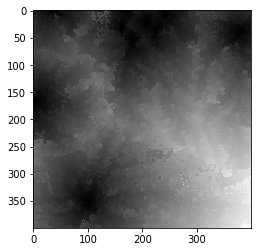

In [ ]:
m=normalize(m,SIZE)
plt.gray()
plt.imshow(m, interpolation='nearest')

plt.show()

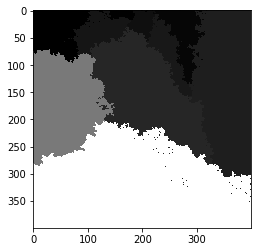

In [ ]:

m_segmented=recolor(m,site,SIZE)

plt.gray()
plt.imshow(m_segmented, interpolation='nearest')


plt.show()

In [ ]:
#m2=dijsktra(G,[10,100,499,867,932,3000,5222,6310,7438,9898],2)
#m2= dijsktra(G,[999,11300,200311,400499,87321,100400,120999,150333,17777,195000,210476,240987],2)
#m2= dijsktra(G,[999,50499,87321,100400,17777,195000,240987],2)
#m2=dijsktra(G,[10,100,34499,39867,932,3000,15222,6310,7438,19898],2 )
#m2=dijsktra(G,[10,100,299,167,332,60],2)
#m2,site=dijsktra(G, [10,510,999,11300,20311,25080,50499,87321,100400,120999,150333,17777,195000,210476,240987],2)
#m2,site=dijsktra(G, [90,210,999,16090,20999,23080,50401,87100,100800,120250,150333,195099,210700,240120],2)
m2,site=dijsktra(G, [90,210,999,1609,5000,8686],2)


160000


NameError: ignored

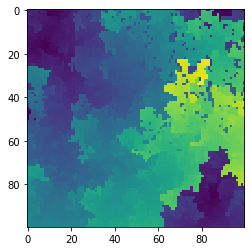

In [ ]:
from matplotlib import pyplot as plt
m2=normalize(m2)

plt.imshow(m2, interpolation='nearest')

plt.show()

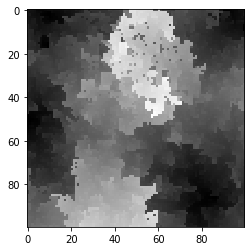

In [ ]:
plt.imshow(m2, interpolation='nearest')

plt.show()

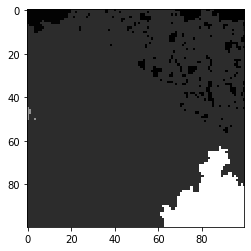

In [ ]:
from matplotlib import pyplot as plt

m_segmented=recolor(m2,site)

plt.gray()
plt.imshow(m_segmented, interpolation='nearest')

plt.show()

In [ ]:
m4,site=dijsktra(G,[999.0,11300.0,200311.0,6000.0,40999.0,106550.0,78320.0,160093.0],4)

250000


In [ ]:
len(dist)

NameError: ignored

In [ ]:
m4

array([[1.3690e+03, 1.3050e+03, 1.3780e+03, ..., 9.2000e+01, 1.0400e+02,
        1.3000e+02],
       [1.2840e+03, 1.2830e+03, 1.3480e+03, ..., 1.1700e+02, 1.7000e+02,
        0.0000e+00],
       [1.2760e+03, 1.2790e+03, 1.2590e+03, ..., 1.6000e+02, 6.1000e+01,
        5.0000e+00],
       ...,
       [1.4790e+04, 1.4744e+04, 1.4702e+04, ..., 2.5041e+04, 2.5075e+04,
        2.5133e+04],
       [1.4848e+04, 1.4780e+04, 1.4840e+04, ..., 2.5069e+04, 2.5062e+04,
        2.5097e+04],
       [1.4886e+04, 1.4839e+04, 1.4854e+04, ..., 2.5043e+04, 2.5087e+04,
        2.5161e+04]])

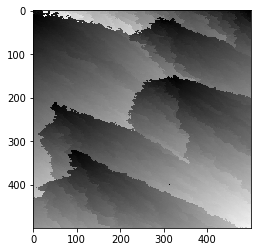

In [ ]:
from matplotlib import pyplot as plt
plt.gray()
plt.imshow(m4, interpolation='nearest')

plt.show()

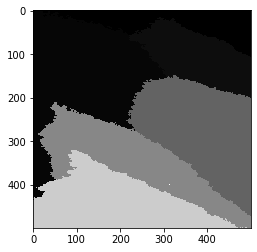

In [ ]:
m_segmented=recolor(m4,site)

plt.gray()
plt.imshow(m_segmented, interpolation='nearest')

plt.show()

In [ ]:
m2,site=dijsktra(G, [90,210,999,1609,5000,8686],2)

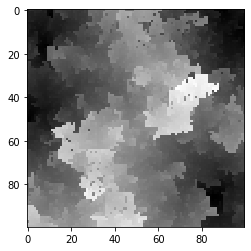

In [ ]:
plt.gray()
plt.imshow(m2, interpolation='nearest')

plt.show()

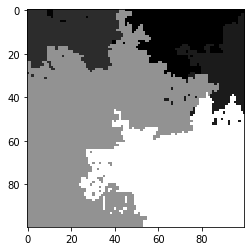

In [ ]:
m2_segmented=recolor(m2,site)

plt.gray()
plt.imshow(m2_segmented, interpolation='nearest')

plt.show()

In [ ]:
m5,site=dijsktra(G, [90,210,999,1609,5000,8686],5)

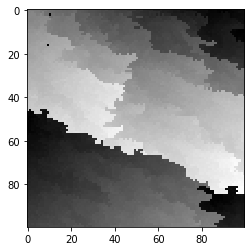

In [ ]:
plt.gray()
plt.imshow(m5, interpolation='nearest')

plt.show()

In [ ]:
m3,site=dijsktra(G, [90,210,999,1609,8686,130878,34546,10989,20543,69432,19000,148777,154389,89060,122130],3)

160000


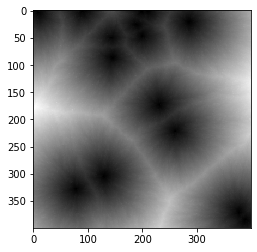

In [ ]:
plt.gray()
plt.imshow(m3, interpolation='nearest')

plt.show()

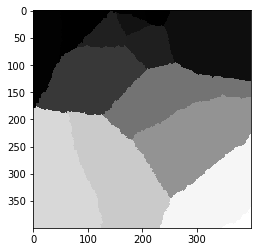

In [ ]:
segmented=recolor(m3,site)

plt.gray()
plt.imshow(segmented, interpolation='nearest')

plt.show()

In [ ]:
m3b,site=dijsktra(G, [90,210,999,1609,5000,8686],3) #dist+ (1/cost)

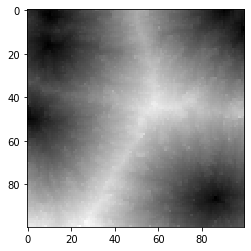

In [ ]:
plt.gray()
plt.imshow(m3b, interpolation='nearest')

plt.show()

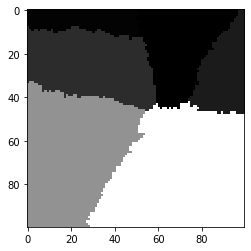

In [ ]:
m3b_segmented=recolor(m3b,site)

plt.gray()
plt.imshow(m3b_segmented, interpolation='nearest')

plt.show()

## New dijkstra for 2nd max and 3rd max edges

In [ ]:



import math
import queue as Q
import heapq as hq
import ast


def DIJKSTRA(Graph, src, costMetric):
    # costmetric 0=dijkstra, 1=threshold with 50, 2=multiplied maxEdge by 1000

    c = 0
    start = [None] * len(src)
    for i in src:
        start[c] = int(i)
        c = c + 1

    # print(start)
    matrix = np.zeros(shape=(size, size))
    dist = [None] * (size * size)
    print(len(dist))
    prev = [None] * (size * size)
    maxEdge = [math.inf] * (size * size)
    site = [None] * (size * size)
    paths = [[]] * (size * size)

    for j in start:
        dist[j] = 0
        maxEdge[j] = 0
        site[j] = j
        paths[j].append(0)

    q = Q.PriorityQueue()

    for v in Graph:
        vID = v.get_id()  # float originally

        if (not (int(vID) in start)):
            dist[int(vID)] = math.inf  # index has to be int
            prev[int(vID)] = None

        q.put(vID, dist[int(vID)])

    while not q.empty():

        uu = q.get()

        u = Graph.get_vertex(uu)  # turning uu into a vertex item

        if (costMetric == 0):
            findcost0(u, dist, prev, q, site)

        if (costMetric == 1):
            findcost1(u, dist, prev, q, site)

        if (costMetric == 2):  # max edge
            findcostmax(u, dist, prev, q, paths, site)

        if (costMetric == 3):  # reciprocal of distance
            findcost3(u, dist, prev, q, site)

        if (costMetric == 4):  # second max edge
            findcostsecmax(u, dist, prev, q, paths, site)

        if (costMetric == 5):  # third max edge
            findcostthirdmax(u, dist, prev, q, paths, site)

    for x in range(size):
        for y in range(size):
            matrix[x][y] = dist[x * size + y]

    return matrix, site

In [ ]:
def findcostwrong(u, dist, prev, q, paths, site):  # SECOND MAX EDGE

    for n in u.get_connections():
        cost = u.get_weight(n)
        uid = u.get_id()

        path = paths[int(uid)]
        pathsorted=sorted(paths,key=float)
        secmaxE = pathsorted[-2]

        if cost > secmaxE:
            secmaxE = cost

        path_distance = dist[int(uid)] + cost
        path_cost = path_distance + secmaxE * 1000
        nid = n.get_id()

        if path_cost < dist[int(nid)] + sorted( paths,key=float)[-2] * 1000:
            dist[int(nid)] = path_distance  # original_dist #new_dist runs into infinite loop
            prev[int(nid)] = u
            site[int(nid)] = site[int(uid)]
            paths[int(nid)] = paths[int(uid)].copy()
            paths[int(nid)].append(cost)
            q.put(nid, path_distance)

In [ ]:
m,site=dijsktranew(G, [90,210,999,1609,8686,130878,34546,10989,20543,69432,19000,148777,154389,89060,122130],5)

160000


In [ ]:
m,site=dijsktranew(G, [90,210,999,1609,8686,9878,4546,1098],5)

10000


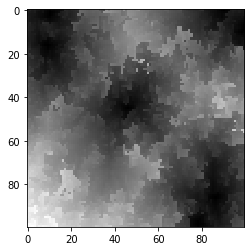

In [ ]:
plt.gray()
plt.imshow(m, interpolation='nearest')

plt.show()

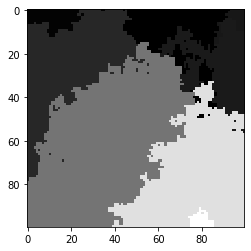

In [ ]:

segmented=recolor(m,site)
plt.gray()
plt.imshow(segmented, interpolation='nearest')
plt.show()

In [ ]:
m4,site=dijsktra(G, [90,210,999,1609,5000,8686],4)

10000
